## Observations and Insights 

* The Pymaceuticals study consists of approximately 51% male mice and 49% female mice.
* Of the ten drug regimens (including the placebo) in the study, the Capomulin and Ramicane treatment are noticeably most promising yielding on average smaller tumor volumes after treatment.
* It is important to note, however, that the study size of mice undergoing the Capomulin and Ramicane treatments are larger than the other regimens. 
* For mice that are given the Capomulin regimen, average weight and tumor volume are positively correlated with and r-squared value of 0.71, indicating a slightly strong correlation. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
len(combined_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse["Mouse ID"]) == False]
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
drug_regimen_mean = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_regimen_median = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_regimen_var = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_regimen_std = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_regimen_sem = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
drug_regimen_stats = pd.DataFrame({"Tumor Volume Mean": drug_regimen_mean, "Tumor Volume Median": 
                                drug_regimen_median, "Tumor Volume Var": drug_regimen_var, 
                                "Tumor Volume STD": drug_regimen_std, "Tumor Volume SEM": 
                                drug_regimen_sem})
drug_regimen_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Var,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

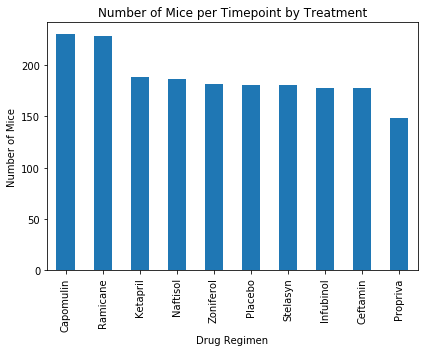

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course 
# of the study using pandas.
mice_count = cleaned_data["Drug Regimen"].value_counts()
mice_count.plot(kind="bar", title="Number of Mice per Timepoint by Treatment", align="center", figsize=(6,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

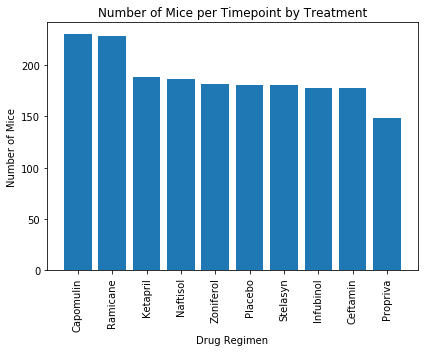

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course 
# of the study using pyplot.
mice_count = cleaned_data["Drug Regimen"].value_counts()
plt.figure(figsize=(6,5))
plt.bar(mice_count.index.values, mice_count.values, align="center")
plt.title("Number of Mice per Timepoint by Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Pie Plots

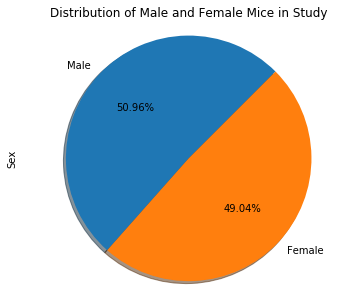

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = cleaned_data["Sex"].value_counts()
mice_gender.plot(kind="pie", autopct="%1.2f%%", title="Distribution of Male and Female Mice in Study", 
                 startangle=45, shadow=True, figsize=(6, 5))
plt.axis("equal")
plt.show();

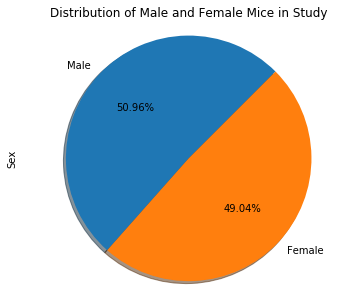

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = cleaned_data["Sex"].value_counts()
gender_key = mice_gender.keys()
plt.figure(figsize=(6, 5))
plt.pie(mice_gender.values, labels=gender_key, autopct="%1.2f%%", startangle=45, shadow=True, )
plt.title("Distribution of Male and Female Mice in Study")
plt.ylabel("Sex")
plt.axis("equal")
plt.show();

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. 

In [14]:
#Calculate final tumor volume in each mouse in the Capomulin regimen
capomulin_group = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
cap_final_tumors = capomulin_group.groupby(["Mouse ID", "Drug Regimen"]).last()["Tumor Volume (mm3)"]
cap_final_tumors.head()

Mouse ID  Drug Regimen
b128      Capomulin       38.982878
b742      Capomulin       38.939633
f966      Capomulin       30.485985
g288      Capomulin       37.074024
g316      Capomulin       40.159220
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#Calculate final tumor volume in each mouse in the Ramicane regimen
ramicane_group = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Ramicane"]
ram_final_tumors = ramicane_group.groupby(["Mouse ID", "Drug Regimen"]).last()["Tumor Volume (mm3)"]
ram_final_tumors.head()

Mouse ID  Drug Regimen
a411      Ramicane        38.407618
a444      Ramicane        43.047543
a520      Ramicane        38.810366
a644      Ramicane        32.978522
c458      Ramicane        38.342008
Name: Tumor Volume (mm3), dtype: float64

In [16]:
#Calculate final tumor volume in each mouse in the Infubinol regimen
infubinol_group = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Infubinol"]
inf_final_tumors = infubinol_group.groupby(["Mouse ID", "Drug Regimen"]).last()["Tumor Volume (mm3)"]
inf_final_tumors.head()

Mouse ID  Drug Regimen
a203      Infubinol       67.973419
a251      Infubinol       65.525743
a577      Infubinol       57.031862
a685      Infubinol       66.083066
c139      Infubinol       72.226731
Name: Tumor Volume (mm3), dtype: float64

In [17]:
#Calculate final tumor volume in each mouse in the Ceftamin regimen
ceftamin_group = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Ceftamin"]
cef_final_tumors = ceftamin_group.groupby(["Mouse ID", "Drug Regimen"]).last()["Tumor Volume (mm3)"]
cef_final_tumors.head()

Mouse ID  Drug Regimen
a275      Ceftamin        62.999356
b447      Ceftamin        45.000000
b487      Ceftamin        56.057749
b759      Ceftamin        55.742829
f436      Ceftamin        48.722078
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

#Capomulin regimen
cap_quartiles = cap_final_tumors.quantile([.25, .5, .75])
cap_lowerq = cap_quartiles[.25]
print(f"The lower quartile of final tumor volume for Capomulin regimen is {cap_lowerq}.")
cap_upperq = cap_quartiles[.75]
print(f"The upper quartile of final tumor volume for Capomulin regimen is {cap_upperq}.")
cap_iqr = cap_upperq - cap_lowerq
print(f"The interquartile range of final tumor volume for Capomulin regimen is {cap_iqr}.")
print(f"The the median tumor volume for the Capomulin regimen is: {cap_quartiles[0.5]} ")
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Tumor volumes below {cap_lower_bound} could be outliers.")
print(f"Tumor volumes {cap_upper_bound} could be outliers.")

The lower quartile of final tumor volume for Capomulin regimen is 32.37735684.
The upper quartile of final tumor volume for Capomulin regimen is 40.1592203.
The interquartile range of final tumor volume for Capomulin regimen is 7.781863460000004.
The the median tumor volume for the Capomulin regimen is: 38.125164399999996 
Tumor volumes below 20.70456164999999 could be outliers.
Tumor volumes 51.83201549 could be outliers.


In [19]:
#Ramicane regimen
ram_quartiles = ram_final_tumors.quantile([.25, .5, .75])
ram_lowerq = ram_quartiles[.25]
print(f"The lower quartile of final tumor volume for Ramicane regimen is {ram_lowerq}.")
ram_upperq = ram_quartiles[.75]
print(f"The upper quartile of final tumor volume for Ramicane regimen is {ram_upperq}.")
ram_iqr = ram_upperq - ram_lowerq
print(f"The interquartile range of final tumor volume for Ramicane regimen is {ram_iqr}.")
print(f"The the median tumor volume for the Ramicane regimen is: {ram_quartiles[0.5]} ")
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Tumor volumes below {ram_lower_bound} could be outliers.")
print(f"Tumor volumes {ram_upper_bound} could be outliers.")

The lower quartile of final tumor volume for Ramicane regimen is 31.56046955.
The upper quartile of final tumor volume for Ramicane regimen is 40.65900627.
The interquartile range of final tumor volume for Ramicane regimen is 9.098536719999998.
The the median tumor volume for the Ramicane regimen is: 36.56165229 
Tumor volumes below 17.912664470000003 could be outliers.
Tumor volumes 54.30681135 could be outliers.


In [20]:
#Infubinol regimen
inf_quartiles = inf_final_tumors.quantile([.25, .5, .75])
inf_lowerq = inf_quartiles[.25]
print(f"The lower quartile of final tumor volume for Infubinol regimen is {inf_lowerq}.")
inf_upperq = inf_quartiles[.75]
print(f"The upper quartile of final tumor volume for Infubinol regimen is {inf_upperq}.")
inf_iqr = inf_upperq - inf_lowerq
print(f"The interquartile range of final tumor volume for Infubinol regimen is {inf_iqr}.")
print(f"The the median tumor volume for the Capomulin regimen is: {inf_quartiles[0.5]} ")
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Tumor volumes below {inf_lower_bound} could be outliers.")
print(f"Tumor volumes {inf_upper_bound} could be outliers.")

The lower quartile of final tumor volume for Infubinol regimen is 54.04860769.
The upper quartile of final tumor volume for Infubinol regimen is 65.52574285.
The interquartile range of final tumor volume for Infubinol regimen is 11.477135160000003.
The the median tumor volume for the Capomulin regimen is: 60.16518046 
Tumor volumes below 36.83290494999999 could be outliers.
Tumor volumes 82.74144559000001 could be outliers.


In [21]:
#Ceftamin regimen
cef_quartiles = cef_final_tumors.quantile([.25, .5, .75])
cef_lowerq = cef_quartiles[.25]
print(f"The lower quartile of final tumor volume for Ceftamin regimen is {cef_lowerq}.")
cef_upperq = cef_quartiles[.75]
print(f"The upper quartile of final tumor volume for Ceftamin regimen is {cef_upperq}.")
cef_iqr = cef_upperq - cef_lowerq
print(f"The interquartile range of final tumor volume for Ceftamin regimen is {cef_iqr}.")
print(f"The the median tumor volume for the Capomulin regimen is: {cef_quartiles[0.5]} ")
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Tumor volumes below {cef_lower_bound} could be outliers.")
print(f"Tumor volumes {cef_upper_bound} could be outliers.")

The lower quartile of final tumor volume for Ceftamin regimen is 48.72207785.
The upper quartile of final tumor volume for Ceftamin regimen is 64.29983003.
The interquartile range of final tumor volume for Ceftamin regimen is 15.577752179999997.
The the median tumor volume for the Capomulin regimen is: 59.85195552 
Tumor volumes below 25.355449580000002 could be outliers.
Tumor volumes 87.66645829999999 could be outliers.


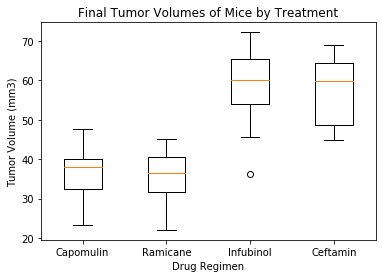

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
plt.boxplot([cap_final_tumors, ram_final_tumors, inf_final_tumors, cef_final_tumors], labels=drug_regimen)
plt.title("Final Tumor Volumes of Mice by Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show();

## Line and Scatter Plots

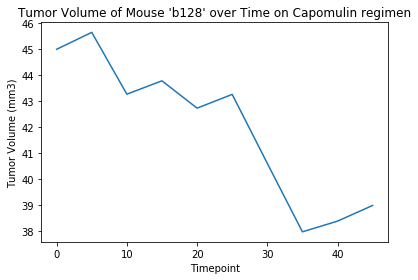

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_time_tumor = capomulin_group.loc[capomulin_group["Mouse ID"]=="b128"]
x_axis = cap_time_tumor["Timepoint"]
y_axis = cap_time_tumor["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Tumor Volume of Mouse 'b128' over Time on Capomulin regimen")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.show();

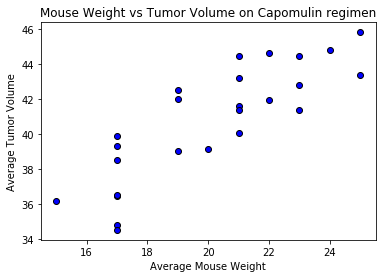

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg_weight = capomulin_group.groupby("Mouse ID")["Weight (g)"].mean()
cap_avg_tumor = capomulin_group.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(cap_avg_weight, cap_avg_tumor, marker="o", facecolors="blue", edgecolors="black")
plt.title("Mouse Weight vs Tumor Volume on Capomulin regimen")
plt.xlabel("Average Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show();

## Correlation and Regression

The correlation coefficent (r-squared) is: 0.7088568047708717


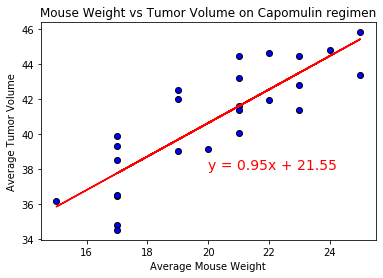

In [25]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen

x_values = cap_avg_weight
y_values = cap_avg_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=14,color="red")
plt.title("Mouse Weight vs Tumor Volume on Capomulin regimen")
plt.xlabel("Average Mouse Weight")
plt.ylabel("Average Tumor Volume")
print(f"The correlation coefficent (r-squared) is: {rvalue**2}")
plt.show();